<a href="https://colab.research.google.com/github/sanAkel/altimeter-wet_trop_corr-WTC-/blob/main/rtofs_ssh_uv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xarray as xr
import pandas as pd
import numpy as np

# Assemble data
- Forecast: `rtofs_glo_2ds_f<hr>_diag.nc`
- Nowcast: `rtofs_glo_2ds_n<hr>_diag.nc` (has an offset of 1-day, see time stamp in netcdf file, *not* in file name!).

In [2]:
# Forecast data
#!wget https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs.20240201/rtofs_glo_2ds_f001_diag.nc

# Nowcast
#!wget https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs.20240201/rtofs_glo_2ds_n000_diag.nc

## Set inputs:
- Data URL.
- Dates to download.
- hours (of nowcast/forecast).

In [3]:
url_base="https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs."
start_date, end_date = ["20240201", "20240205"]
hours = np.arange(0,1)
# Nowcast is hourly: #np.arange(0, 25, 1)

fType="nowcast" # test nowcast (or analysis) for now; forecast later.
fSuff="_diag.nc"

if fType == "forecast":
  fPref="rtofs_glo_2ds_f"
  "rtofs_glo_2ds_n000_diag.nc"
else:
  fPref="rtofs_glo_2ds_n"

In [4]:
data_dates = pd.date_range(start=start_date, end=end_date)
for dd in data_dates:
  print("Downloading data for:\t", dd.strftime("%Y%m%d"))
  for hr in hours:
    url = url_base + dd.strftime("%Y%m%d") + "/" + fPref + str(hr).zfill(3)+ fSuff
    fName = fPref + str(hr).zfill(3)+ fSuff
    fName_save = fPref + dd.strftime("_%Y%m%d_") + str(hr).zfill(3)+ fSuff
    #print(url)
    !wget $url
    !mv $fName $fName_save

--2024-10-13 00:36:46--  https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs.20240201/rtofs_glo_2ds_n000_diag.nc
Resolving noaa-nws-rtofs-pds.s3.amazonaws.com (noaa-nws-rtofs-pds.s3.amazonaws.com)... 52.217.163.201, 3.5.2.74, 52.216.42.161, ...
Connecting to noaa-nws-rtofs-pds.s3.amazonaws.com (noaa-nws-rtofs-pds.s3.amazonaws.com)|52.217.163.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194639166 (186M) [application/x-netcdf]
Saving to: ‘rtofs_glo_2ds_n000_diag.nc’

rtofs_glo_2ds_n000_ 100%[===================>] 185.62M  24.2MB/s    in 7.9s    

2024-10-13 00:36:55 (23.4 MB/s) - ‘rtofs_glo_2ds_n000_diag.nc’ saved [194639166/194639166]

--2024-10-13 00:36:55--  https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs.20240202/rtofs_glo_2ds_n000_diag.nc
Resolving noaa-nws-rtofs-pds.s3.amazonaws.com (noaa-nws-rtofs-pds.s3.amazonaws.com)... 3.5.30.145, 54.231.201.81, 16.182.67.121, ...
Connecting to noaa-nws-rtofs-pds.s3.amazonaws.com (noaa-nws-rtofs-pds.s3.amazonaws

In [5]:
!ls -alt *.nc

-rw-r--r-- 1 root root 194675875 Feb  5  2024 rtofs_glo_2ds_n_20240205_000_diag.nc
-rw-r--r-- 1 root root 194726653 Feb  4  2024 rtofs_glo_2ds_n_20240204_000_diag.nc
-rw-r--r-- 1 root root 194617610 Feb  3  2024 rtofs_glo_2ds_n_20240203_000_diag.nc
-rw-r--r-- 1 root root 194639952 Feb  2  2024 rtofs_glo_2ds_n_20240202_000_diag.nc
-rw-r--r-- 1 root root 194639166 Feb  1  2024 rtofs_glo_2ds_n_20240201_000_diag.nc


In [6]:
ds=xr.open_mfdataset(fPref+"*"+fSuff)
ds

<xarray.Dataset> Size: 2GB
Dimensions:                           (MT: 5, Y: 3298, X: 4500)
Coordinates:
  * MT                                (MT) datetime64[ns] 40B 2024-01-31 ... ...
    Date                              (MT) float64 40B dask.array<chunksize=(1,), meta=np.ndarray>
  * Y                                 (Y) int32 13kB 1 2 3 4 ... 3296 3297 3298
  * X                                 (X) int32 18kB 1 2 3 4 ... 4498 4499 4500
    Latitude                          (Y, X) float32 59MB dask.array<chunksize=(825, 1125), meta=np.ndarray>
    Longitude                         (Y, X) float32 59MB dask.array<chunksize=(825, 1125), meta=np.ndarray>
Data variables:
    ssh                               (MT, Y, X) float32 297MB dask.array<chunksize=(1, 825, 1125), meta=np.ndarray>
    u_barotropic_velocity             (MT, Y, X) float32 297MB dask.array<chunksize=(1, 825, 1125), meta=np.ndarray>
    v_barotropic_velocity             (MT, Y, X) float32 297MB dask.array<chunksize=(1, 825, 1125), meta=np.ndarray>
    surface_boundary_layer_thickness  (MT, Y, X) float32 297MB dask.array<chunksize=(1, 825, 1125), meta=np.ndarray>
    mixed_layer_thickness             (MT, Y, X) float32 297MB dask.array<chunksize=(1, 825, 1125), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       HYCOM archive file
    experiment:   92.8
    history:      archv2ncdf2d

## Cut out region of _interest_.

### Dan wants `0- 10N`, `180- 120W`. Let's get him more than what he wants! 😀

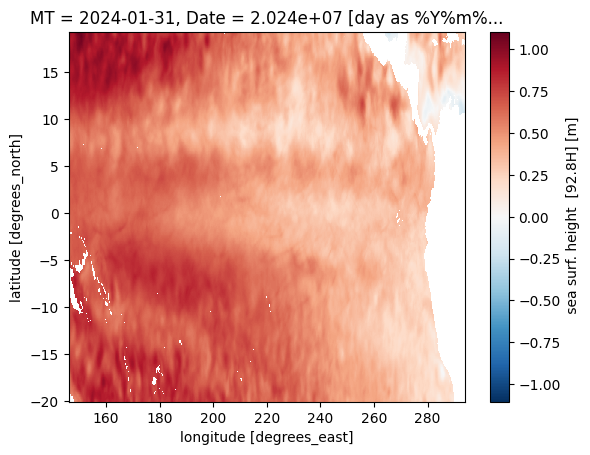

In [7]:
ds_cut=ds.sel(X=slice(900,2750), Y=slice(1250, 1750))

# sanity check
ds_cut.isel(MT=0).ssh.plot(x='Longitude', y='Latitude')

# Save data and move to drive

In [8]:
saved_data_file = fPref+"_"+start_date+"_"+end_date+".nc"
ds_cut.to_netcdf(saved_data_file)
print("Saved to: ", saved_data_file)

Saved to:  rtofs_glo_2ds_n_20240201_20240205.nc


In [9]:
# Mount drive - to save files once done
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!cp -r /content/$saved_data_file /content/drive/MyDrive/tmp-12oct2024/